In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
dat1 = pd.read_csv("dataset.csv")

In [3]:
dat1.info()
dat1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df1 = dat1.drop("Unnamed: 0", axis=1)
df1.isna().sum()


track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [5]:
df1 = df1.dropna()
df1.isna().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [6]:
df1= df1.drop_duplicates()
df1.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [7]:
notes = df1["key"]
print(notes)

0         1
1         1
2         0
3         0
4         2
         ..
113995    5
113996    0
113997    0
113998    7
113999    1
Name: key, Length: 113549, dtype: int64


In [8]:
popular_artists = df1.groupby("artists").count().sort_values(by='popularity', ascending=False)['popularity'][:20]
popular_artists

artists
The Beatles              279
George Jones             260
Stevie Wonder            235
Linkin Park              224
Ella Fitzgerald          221
Prateek Kuhad            217
Feid                     201
Chuck Berry              190
Håkan Hellström          183
OneRepublic              181
The Beach Boys           173
my little airport        171
Charlie Brown Jr.        169
Elvis Presley            169
Red Hot Chili Peppers    158
Bryan Adams              157
Scooter                  155
Arctic Monkeys           152
Daddy Yankee             151
BTS                      151
Name: popularity, dtype: int64

In [9]:
famgen = df1[["track_genre", "popularity"]].sort_values(by="popularity", ascending=False)[:10]
famgen

,track_genre,popularity
81051,pop,100
20001,dance,100
51664,hip-hop,99
68303,latino,98
81210,pop,98
67356,latin,98
88410,reggae,98
30003,edm,98
89411,reggaeton,98
20008,dance,98


In [15]:
corr_tabl = df1.corr(method="pearson", numeric_only=True)
corr_tabl

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.007928,0.043938,0.034407,-0.002447,-0.004167,0.047368,-0.015009,-0.045463,-0.022356,-0.094718,-0.005668,-0.041097,0.012187,0.030567
duration_ms,-0.007928,1.000000,-0.066005,-0.074117,0.058160,0.008519,-0.004233,-0.035961,-0.063194,-0.103676,0.125301,0.010199,-0.154795,0.024312,0.018351
explicit,0.043938,-0.066005,1.000000,0.122179,0.096256,0.004843,0.107988,-0.037387,0.307455,-0.093748,-0.103169,0.032367,-0.003779,-0.003097,0.038234
danceability,0.034407,-0.074117,0.122179,1.000000,0.131694,0.036546,0.256559,-0.069783,0.108236,-0.169181,-0.183974,-0.131651,0.476755,-0.051517,0.207370
energy,-0.002447,0.058160,0.096256,0.131694,1.000000,0.048047,0.760624,-0.079331,0.141976,-0.732747,-0.179967,0.184810,0.258451,0.247361,0.186671
key,-0.004167,0.008519,0.004843,0.036546,0.048047,1.000000,0.038359,-0.135871,0.020820,-0.041124,-0.006819,-0.001518,0.034233,0.010903,0.015122
loudness,0.047368,-0.004233,0.107988,0.256559,0.760624,0.038359,1.000000,-0.042074,0.060088,-0.588111,-0.432109,0.076792,0.279428,0.212181,0.191648
mode,-0.015009,-0.035961,-0.037387,-0.069783,-0.079331,-0.135871,-0.042074,1.000000,-0.046773,0.096548,-0.050787,0.013900,0.021411,0.000371,-0.024365
speechiness,-0.045463,-0.063194,0.307455,0.108236,0.141976,0.020820,0.060088,-0.046773,1.000000,-0.001378,-0.089214,0.205092,0.036393,0.017167,-0.000397
acousticness,-0.022356,-0.103676,-0.093748,-0.169181,-0.732747,-0.041124,-0.588111,0.096548,-0.001378,1.000000,0.102134,-0.020313,-0.106240,-0.207620,-0.175621


In [16]:
sorted_corr = corr_tabl["key"].sort_values(ascending=False)
top_5_correlated_columns = sorted_corr.index[0:5]

# Display the top 5 correlated columns and their correlation values
top_5_correlations = corr_table.loc[top_5_correlated_columns, "key"]
print(top_5_correlations)


key             1.000000
energy          0.048047
loudness        0.038359
danceability    0.036546
valence         0.034233
Name: key, dtype: float64


In [17]:
sorted_corr = corr_table["popularity"].sort_values(ascending=False)
top_5_correlated_columns = sorted_corr.index[1:10]

# Display the top 5 correlated columns and their correlation values
top_5_correlations = corr_table.loc[top_5_correlated_columns, "popularity"]
print(top_5_correlations)

loudness          0.047368
explicit          0.043938
danceability      0.034407
time_signature    0.030567
tempo             0.012187
energy           -0.002447
key              -0.004167
liveness         -0.005668
duration_ms      -0.007928
Name: popularity, dtype: float64


In [34]:
#the above 2 are done to analyse the common points between music key/scales and popularity for further processes

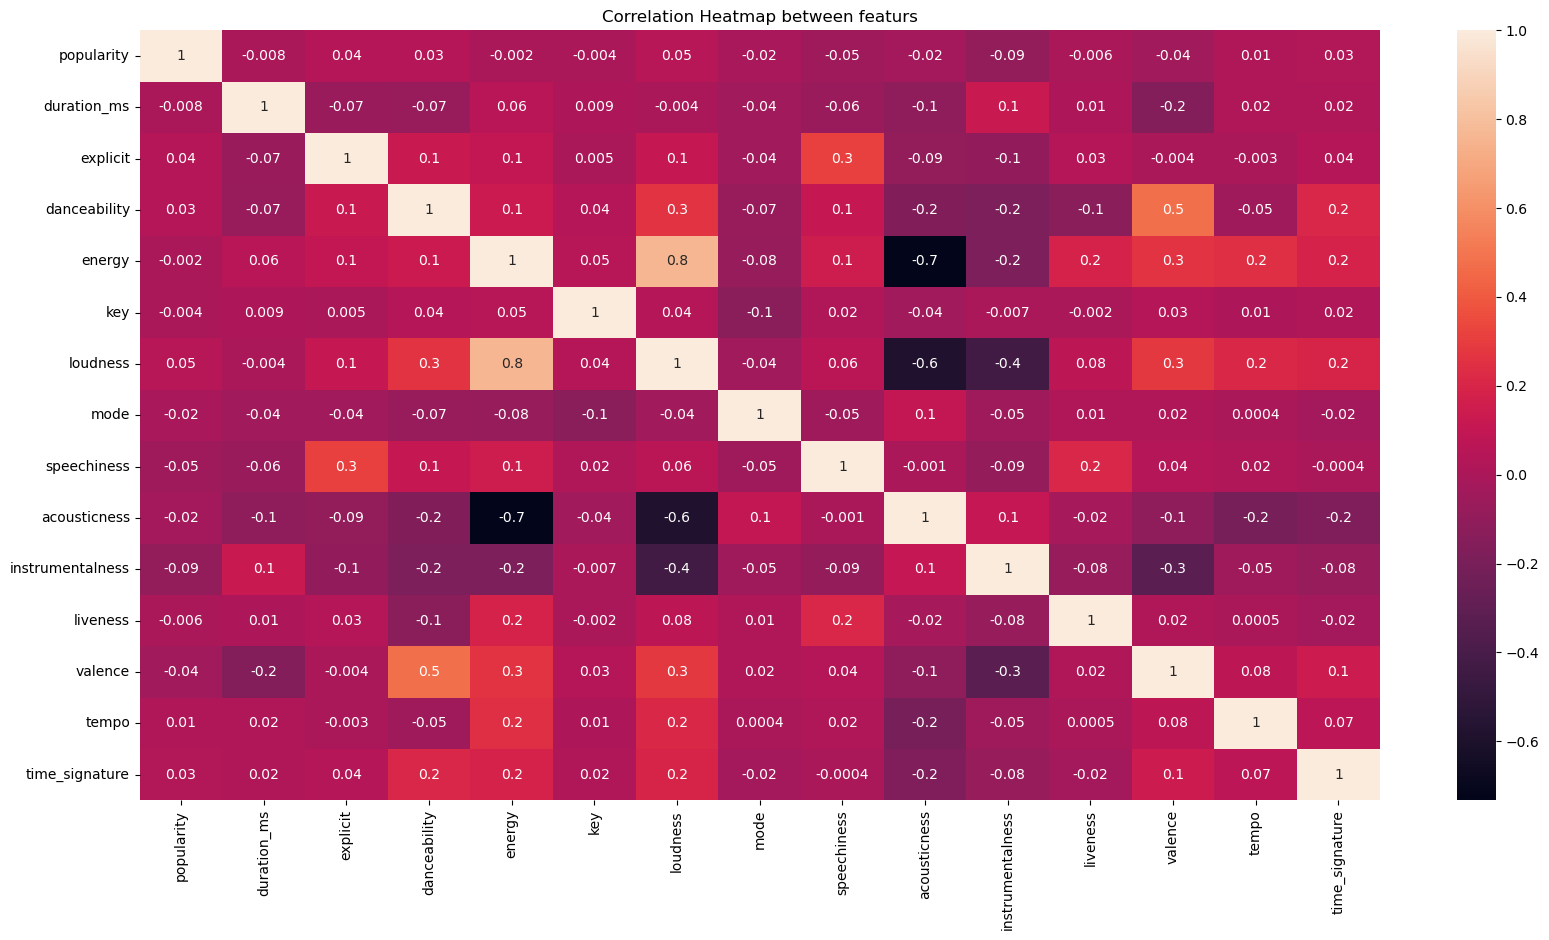

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(corr_table, annot=True, fmt=".1g")
plt.title("Correlation Heatmap between featurs")
plt.show() 

In [21]:
key_to_note = {
    0: "C",
    1: "C#",
    2: "D",
    3: "D#",
    4: "E",
    5: "F",
    6: "F#",
    7: "G",
    8: "G#",
    9: "A",
    10: "A#",
    11: "B"
}
df1["key"] = pd.to_numeric(df1["key"], errors="coerce")

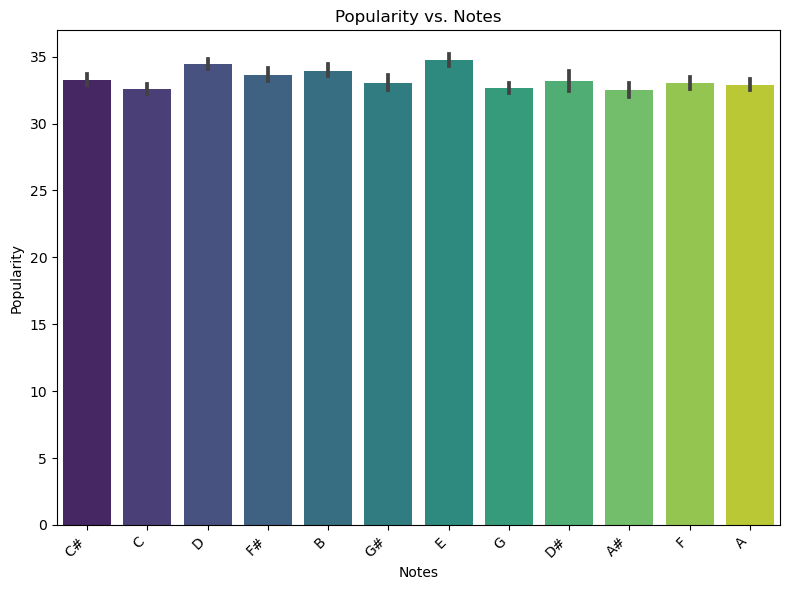

In [27]:
df1["note"] = df1["key"].map(key_to_note)
# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x="note", y="popularity", data=df1, palette="viridis")
plt.xlabel("Notes")
plt.ylabel("Popularity")
plt.title("Popularity vs. Notes")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [38]:
mean_data = top_5_correlations.mean()

print("Mean data for each column:")
print(mean_data)

Mean data for each column:
loudness            0.490656
explicit            0.512000
danceability        0.492455
time_signature      2.503000
tempo             119.492393
dtype: float64


Mean data for each column:
loudness            0.490656
explicit            0.512000
danceability        0.492455
time_signature      2.503000
tempo             119.492393
dtype: float64


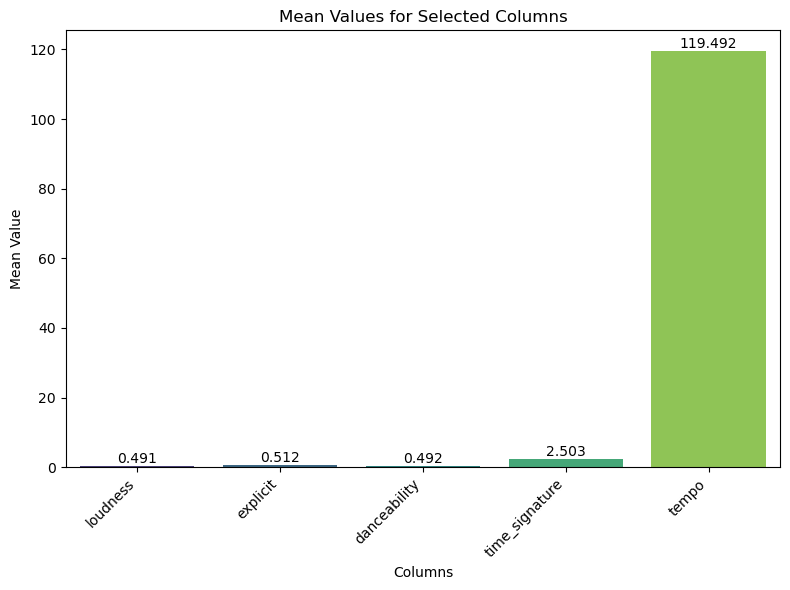

In [35]:
selected_columns = ["loudness", "explicit", "danceability", "time_signature", "tempo"]

mean_values = top_5_correlations[selected_columns].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=mean_values.index, y=mean_values.values, palette="viridis")

for index, value in enumerate(mean_values):
    plt.text(index, value, f"{value:.3f}", ha="center", va="bottom", fontsize=10, color='black')

plt.xlabel("Columns")
plt.ylabel("Mean Value")
plt.title("Mean Values for Selected Columns")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



In [40]:
selected_columns = ["loudness", "explicit", "danceability", "time_signature","tempo"]

most_frequent_values = {}
for column in selected_columns:
    value_counts = top_5_correlations[column].value_counts()
    most_frequent_value = value_counts.idxmax()
    most_frequent_values[column] = most_frequent_value

print("Most frequent values in selected columns:")
print(most_frequent_values)

Most frequent values in selected columns:
{'loudness': 0.9279881432421413, 'explicit': 1, 'danceability': 0.29761190674505, 'time_signature': 1, 'tempo': 156.27790288317948}


In [41]:

range_around_mode = 1 

most_frequent_ranges = {}
for column in top_5_correlations.columns:
    column_data = top_5_correlations[column]
    column_mode = column_data.mode().iloc[0]
    
    # Calculate the frequency distribution of values within the range around the mode
    hist, bins = np.histogram(column_data, bins=np.arange(column_mode - range_around_mode, column_mode + range_around_mode, 0.1))
    
    # Find the interval (bin) with the highest frequency
    most_frequent_range = (bins[np.argmax(hist)], bins[np.argmax(hist) + 1])
    
    most_frequent_ranges[column] = most_frequent_range

print("Most frequent ranges around mode for each column:")
print(most_frequent_ranges)


Most frequent ranges around mode for each column:
{'loudness': (0.10046877920684028, 0.20046877920684036), 'explicit': (1.0, 1.1), 'danceability': (0.30139871877673396, 0.40139871877673383), 'time_signature': (1.0, 1.1), 'tempo': (60.21965345643736, 60.31965345643736)}


In [51]:
import numpy as np

# Most frequent ranges for each column
most_frequent_ranges = {
    'loudness': (0.10046877920684028, 0.20046877920684036),
    'explicit': (1.0, 1.1),
    'danceability': (0.30139871877673396, 0.40139871877673383),
    'time_signature': (1.0, 1.1),
    'tempo': (60.21965345643736, 60.31965345643736)
}

recommended_values = {}
for column, freq_range in most_frequent_ranges.items():
    recommended_value = np.random.uniform(low=freq_range[0], high=freq_range[1])
    recommended_values[column] = recommended_value

print("Recommended values within most frequent ranges:")
print(recommended_values)

Recommended values within most frequent ranges:
{'loudness': 0.15576778240868977, 'explicit': 1.0416720113533733, 'danceability': 0.3695061627671519, 'time_signature': 1.0492346551015395, 'tempo': 60.250936131247734}
